In [2]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
#%load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: Joachims-MacBook-Pro.local

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Feb  1 2022, 19:30:18) [Clang 11.1.0 ]

---------------------------------
Python interpreter: /opt/miniconda3/envs/srh/bin/python


# Die Student t-Verteilung

Die Studentschd $t$-Verteilung ist nach <a href="https://de.wikipedia.org/wiki/William_Sealy_Gosset">William Sealy Gosset</a> ($1876-1937$) benannt, der sie $1908$ erstmals bestimmte. Gosset war einer der besten Oxford-Absolventen in Chemie und Mathematik seiner Generation. Im Jahr $1899$ nahm er eine Stelle als Brauer bei <a href="https://en.wikipedia.org/wiki/Guinness_Brewery">Arthur Guinness Son & Co, Ltd</a> in Dublin, Irland, an. Bei seiner Arbeit für die Guinness-Brauerei interessierte er sich für die Qualitätskontrolle anhand kleiner Proben in verschiedenen Stadien des Produktionsprozesses. Da Guinness seinen Angestellten die Veröffentlichung von Papieren untersagte, um die Weitergabe vertraulicher Informationen zu verhindern, hatte Gosset seine Arbeit unter dem Pseudonym "Student" veröffentlicht, und seine Identität war einige Zeit nach der Veröffentlichung seiner berühmtesten Errungenschaften nicht bekannt, so dass die Verteilung den Namen "Studentsche" oder "$t$-Distribution" erhielt, wodurch sein Name weniger bekannt wurde als seine wichtigen Ergebnisse in der Statistik ({cite:p}`Dümbgen2016` s.81).

Die $t$-Verteilungskurve ist, wie die Normalverteilungskurve, symmetrisch (glockenförmig) um den Mittelwert. Die $t$-Verteilungskurve ist jedoch flacher als die Standard-Normalverteilungskurve. Folglich hat die $t$-Verteilungskurve eine geringere Höhe und eine breitere Streuung als die Standardnormalverteilung.

Die $t$-Verteilung hat nur einen Parameter, die sogenannten <a href="https://de.wikipedia.org/wiki/Anzahl_der_Freiheitsgrade_(Statistik)">**Freiheitsgrade**</a> ($df$). Die Form einer bestimmten $t$-Verteilungskurve hängt von der Anzahl der Freiheitsgrade ($df$) ab. Die Anzahl der Freiheitsgrade für eine $t$-Verteilung ist gleich dem Stichprobenumfang minus eins, das heißt,

$$df = n - 1$$

Wenn der Stichprobenumfang $n$ und damit $df$ zunimmt, nähert sich die $t$-Verteilung der Standardnormalverteilung an. Die Einheiten einer $t$-Verteilung werden mit $t$ bezeichnet. Der Mittelwert der $t$-Verteilung ist gleich $0$, und ihre Standardabweichung beträgt $ \sqrt{df/(df-2)}$ ({cite:p}`fahrmeirstatistik` s.280,s.284).

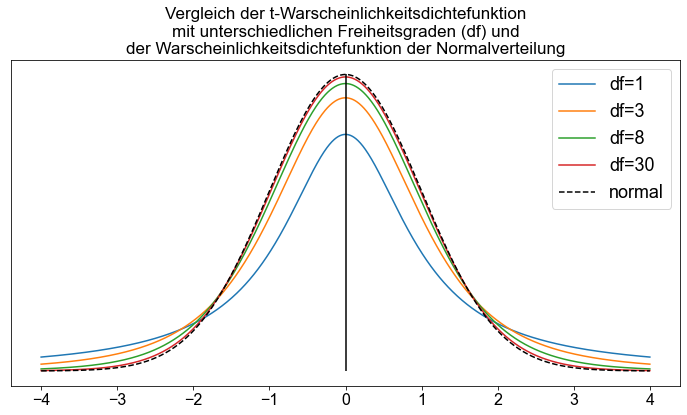

In [30]:
import numpy as np
from scipy.stats import t, norm
import matplotlib.pyplot as plt

df = [1, 3, 8, 30]

x = np.linspace(-4, 4, 1000)
fig, ax = plt.subplots()
for _df in df:
    ax.plot(x, t.pdf(x, df=_df), label=f"df={_df}")
ax.plot(x, norm.pdf(x), label=f"normal", color="k", linestyle="dashed")
ax.vlines(x=0, ymin=0, ymax=norm.pdf(0, 0, 1), color="k")
ax.set_yticks([])
ax.set_title(
    "Vergleich der t-Warscheinlichkeitsdichtefunktion\nmit unterschiedlichen Freiheitsgraden (df) und\nder Warscheinlichkeitsdichtefunktion der Normalverteilung"
)
ax.legend(fontsize=18)

### Grundlegende Eigenschaften von t-Kurven


 - Die Gesamtfläche unter einer $t$-Kurve ist gleich $1$.
 -   Eine $t$-Kurve erstreckt sich unendlich in beide Richtungen und nähert sich dabei der horizontalen Achse, berührt sie aber nie.
-    Eine $t$-Kurve ist symmetrisch um $0$.
-    Mit zunehmender Anzahl von Freiheitsgraden ähneln $t$-Kurven immer mehr der Standard-Normalverteilung.

## Die Studentsche-t-Verteilung in Python
----------------------------------------

In [2]:
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

Python ermöglicht den Zugriff auf die $t$-Verteilung mit den Funktionen `t.pdf()`, `t.cdf()`, `t.ppf()` und `t.rvs()`. Wenden Sie die Funktion `dir()` auf diese Funktionen an, um weitere Informationen zu erhalten.

Die Funktion `t.rvs()` erzeugt Zufallsabweichungen der $t$-Verteilung und wird als`t.rvs(df, loc , scale, size)` geschrieben. Wir können leicht eine Anzahl von $n$ Zufallsstichproben erzeugen. Erinnern Sie sich daran, dass die Anzahl der Freiheitsgrade für eine $t$-Verteilung gleich dem Stichprobenumfang minus eins ist, d.h.,


$$df = n - 1\text{.}$$

In [3]:
# generate random values from t distribution with df=6 and sample size=10
n = 30
t.rvs(df=n - 1, size=n)

array([ 0.2988234 ,  1.76143144, -0.27176957, -0.10467608, -0.44869721,
       -0.85574815, -0.73494675, -1.65054769, -0.13472738, -0.49432919,
        0.60427214,  0.83316934,  0.76269101,  0.33838171, -0.96466872,
       -0.07610489,  0.18297919,  0.9359285 ,  0.01628589, -0.8072886 ,
       -0.94209427,  0.04797931,  0.96205153,  0.36392117,  1.7312446 ,
       -1.67381059, -0.16294088,  1.82562478, -0.82475761,  0.5986768 ])

Außerdem können wir eine sehr große Anzahl von Stichproben erzeugen und sie als Histogramm darstellen.


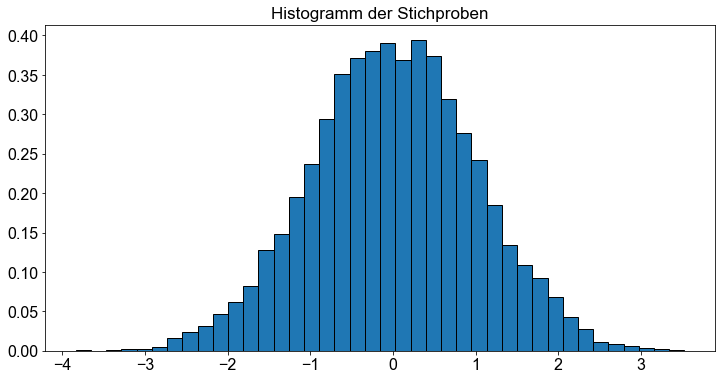

In [4]:
# Erzeuge zufallwerte der t distribution mit df=9999 und sample size=10000
n = 10000
y = t.rvs(df=n - 1, size=n)
fig, ax = plt.subplots()
ax.set_title("Histogramm der Stichproben")
_ = ax.hist(y, bins=40, density=True, edgecolor="k")

Mit der Funktion `t.pdf()` können wir die Wahrscheinlichkeitsdichtefunktion und damit den vertikalen Abstand zwischen der horizontalen Achse und der $t$-Kurve an jedem beliebigen Punkt berechnen. Zur Demonstration konstruieren wir eine $t$-Verteilung mit $df=5$ und berechnen die Wahrscheinlichkeitsdichtefunktion bei $t=-4,-2,0,2,4$.

In [5]:
x = [-4, -2, 0, 2, 4]
y_t = t.pdf(x, df=5)
y_t

array([0.00512373, 0.06509031, 0.37960669, 0.06509031, 0.00512373])

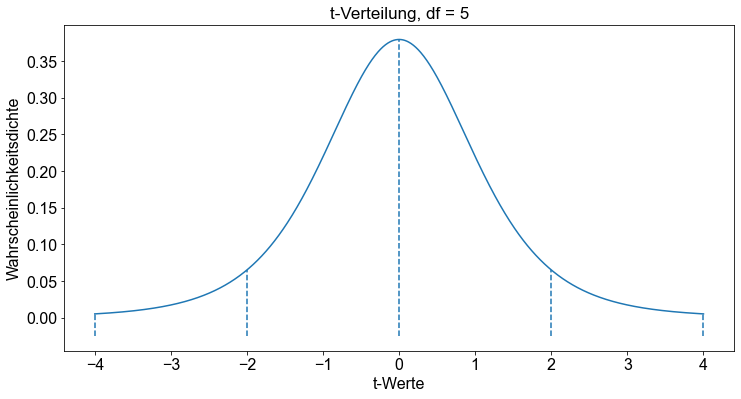

In [6]:
# Erzeuge x-werte
x = np.linspace(-4, 4, num=1000)

# Plotte t-Verteilung
fig, ax = plt.subplots()

ax.set_title("t-Verteilung, df = 5")
ax.set_xlabel("t-Werte")
ax.set_ylabel("Wahrscheinlichkeitsdichte")
ax.plot(x, t.pdf(x, df=5))
for _t in [-4, -2, 0, 2, 4]:
    ax.vlines(_t, ymin=-0.025, ymax=t.pdf(_t, df=5), linestyle="dashed")

Eine weitere sehr nützliche Funktion ist die Funktion `t.cdf()`, die die Fläche unter der $t$-Kurve für ein beliebiges Intervall liefert. Berechnen wir die Fläche unter der Kurve für die Intervalle $j_i= \ ]-\infty \ $,$ \ -2]$ , $]-\infty \ $,$ \ 0]$ , $]-\infty \ $,$ \ 2]$ und $k_i=[-2 \ $,$ \ \infty[$ , $[0 \ $,$ \ \infty[$ , $[2 \ $,$ \ \infty[$ für eine Zufallsvariable mit einer $t$-Verteilung mit $df=5$.

In [7]:
x_cdf_left = []
# Berechne kumulitative Wahrscheinlichkeit links von Wert _t
for _t in [-2, 0, 2]:
    res = t.cdf(_t, df=5)
    print(f"Wert für Fläche links von {_t}: {res}")
    x_cdf_left.append(res)

Wert für Fläche links von -2: 0.05096973941492914
Wert für Fläche links von 0: 0.5
Wert für Fläche links von 2: 0.9490302605850709


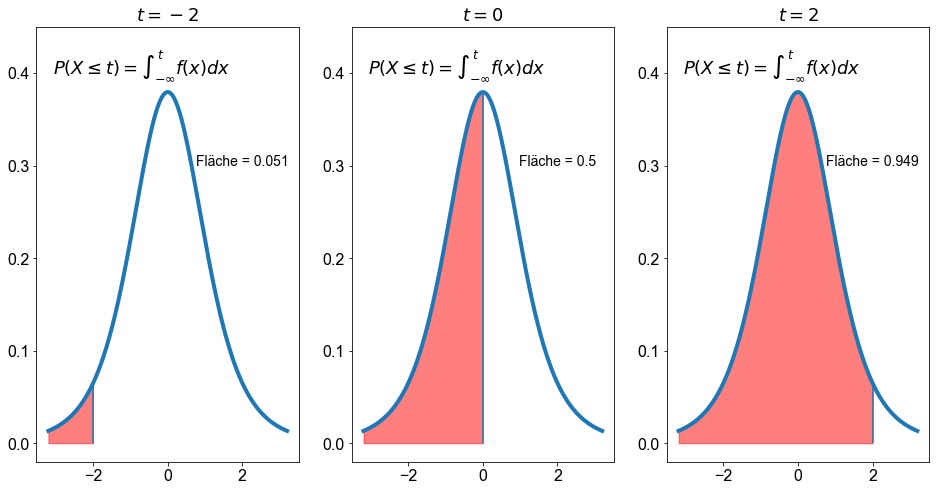

In [8]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

df = 5
fig, ax = plt.subplots(figsize=(16, 8), ncols=3)
# axis 0
x = np.linspace(-3.2, 3.2, 1000)
for e, _t in enumerate([-2, 0, 2]):
    ax[e].plot(x, t.pdf(x, df=df), color="C0", linewidth=4)
    ax[e].vlines(_t, ymin=0, ymax=t.pdf(_t, df=df))
    ax[e].fill_between(x, t.pdf(x, df=df), where=x <= _t, color="r", alpha=0.5)
    ax[e].text(
        -0.7,
        0.4,
        s=r"$P(X \leq {t}) = \int_{-\infty}^{t}f(x)dx$",
        horizontalalignment="center",
        size=18,
    )
    ax[e].text(
        2,
        0.3,
        s=f"Fläche = {np.round(t.cdf(_t, df=df),3)}",
        horizontalalignment="center",
        size=14,
    )
    ax[e].set_title(f"$t={_t}$", size=18)
for _ax in ax:
    _ax.set_ylim(-0.02, 0.45)

In [9]:
x_cdf_right = []
# Berechne kumulitative Wahrscheinlichkeit rechts von Wert _t
for _t in [-2, 0, 2]:
    res = 1 - t.cdf(_t, df=5)
    print(f"Wert für Fläche rechts von {_t}: {res}")
    x_cdf_right.append(res)

Wert für Fläche rechts von -2: 0.9490302605850709
Wert für Fläche rechts von 0: 0.5
Wert für Fläche rechts von 2: 0.050969739414929105


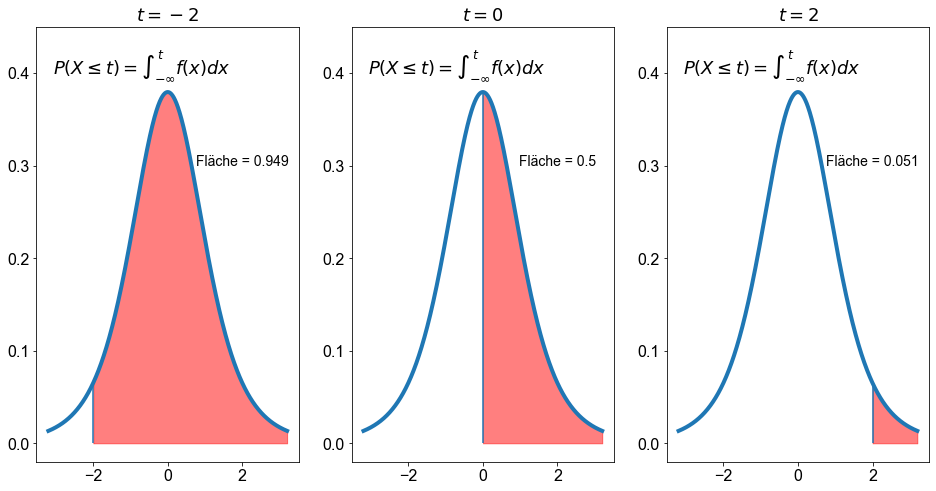

In [10]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

df = 5
fig, ax = plt.subplots(figsize=(16, 8), ncols=3)
# axis 0
x = np.linspace(-3.2, 3.2, 1000)
for e, _t in enumerate([-2, 0, 2]):
    ax[e].plot(x, t.pdf(x, df=df), color="C0", linewidth=4)
    ax[e].vlines(_t, ymin=0, ymax=t.pdf(_t, df=df))
    ax[e].fill_between(x, t.pdf(x, df=df), where=x >= _t, color="r", alpha=0.5)

    ax[e].text(
        -0.7,
        0.4,
        s=r"$P(X \leq {t}) = \int_{-\infty}^{t}f(x)dx$",
        horizontalalignment="center",
        size=18,
    )
    ax[e].text(
        2,
        0.3,
        s=f"Fläche = {np.round(1-t.cdf(_t, df=df),3)}",
        horizontalalignment="center",
        size=14,
    )

    ax[e].set_title(f"$t={_t}$", size=18)
for _ax in ax:
    _ax.set_ylim(-0.02, 0.45)

Die Funktion `t.ppf()` liefert die Quantilfunktion und ist damit die Umkehrfunktion von `t.cdf()`. Für die Intervalle $j_i= ]-\infty \ $,$ \ -2]$ , $]-\infty \ $,$ \ 0]$ , $]-\infty \ $,$ \ 2]$ einer Zufallsvariablen, die einer $t$-Verteilung mit $df=5$ folgt, liefert die Funktion `t.ppf()`...

In [11]:
x_cdf_left

[0.05096973941492914, 0.5, 0.9490302605850709]

In [12]:
for x in x_cdf_left:
    print(f"{round(x,2)}: {round(t.ppf(x, df=5), 2)}")

0.05: -2.0
0.5: 0.0
0.95: 2.0


... und für die Intervalle $k_i=[-2 \ $,$ \ \infty[$ , $[0 \ $,$ \ \infty[$ , $[2 \ $,$ \ \infty[$ einer Zufallsvariablen, die einer $t$-Verteilung mit $df=5$ folgt, liefert die Funktion `t.ppf`

In [13]:
for x in x_cdf_right:
    print(f"{round(x,2)}: {round(t.ppf(x, df=5), 2)}")

0.95: 2.0
0.5: 0.0
0.05: -2.0
